In [16]:

import pandas as pd

In [17]:
df = pd.read_csv("/kaggle/input/fake-news-classification/WELFake_Dataset.csv")

In [18]:
df = df.sample(n=25000, replace=True)

In [19]:
label_counts = df['label'].value_counts()
label_counts


label
1    12830
0    12170
Name: count, dtype: int64

In [20]:
df.head()

,Unnamed: 0,title,text,label
71177,71177,Schools All Over America Are Closing On Electi...,Email \nWill this be the most chaotic election...,1
25971,25971,BREAKING: Iran Publicly Humiliates Obama…Unvei...,A clear violation of Obama s lopsided deal w...,1
3729,3729,TOO MANY MILLENNIALS ARE COOL WITH COMMUNISM,Home › SOCIETY | US NEWS › TOO MANY MILLENNIAL...,1
64420,64420,TOP 10 TWEETS From Democrat Debate,"Here s the fake black guy, Shaun King weighing...",1
39751,39751,HERE’S THE BEST WAY To Silence A Liberal Deman...,Here s a special public service announcement c...,1


In [21]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [22]:
df.dropna(inplace=True);

In [23]:
df.head()

,title,text,label
71177,Schools All Over America Are Closing On Electi...,Email \nWill this be the most chaotic election...,1
25971,BREAKING: Iran Publicly Humiliates Obama…Unvei...,A clear violation of Obama s lopsided deal w...,1
3729,TOO MANY MILLENNIALS ARE COOL WITH COMMUNISM,Home › SOCIETY | US NEWS › TOO MANY MILLENNIAL...,1
64420,TOP 10 TWEETS From Democrat Debate,"Here s the fake black guy, Shaun King weighing...",1
39751,HERE’S THE BEST WAY To Silence A Liberal Deman...,Here s a special public service announcement c...,1


In [24]:
df["title"] = df["title"].str.lower()
df["text"] = df["text"].str.lower()



In [25]:
df.head()

,title,text,label
71177,schools all over america are closing on electi...,email \nwill this be the most chaotic election...,1
25971,breaking: iran publicly humiliates obama…unvei...,a clear violation of obama s lopsided deal w...,1
3729,too many millennials are cool with communism,home › society | us news › too many millennial...,1
64420,top 10 tweets from democrat debate,"here s the fake black guy, shaun king weighing...",1
39751,here’s the best way to silence a liberal deman...,here s a special public service announcement c...,1


In [26]:
df["title"] = df["title"].str.replace("[^\w\s]","")
df["text"] = df["text"].str.replace("[^\w\s]","")

In [27]:
df.head()

,title,text,label
71177,schools all over america are closing on electi...,email \nwill this be the most chaotic election...,1
25971,breaking: iran publicly humiliates obama…unvei...,a clear violation of obama s lopsided deal w...,1
3729,too many millennials are cool with communism,home › society | us news › too many millennial...,1
64420,top 10 tweets from democrat debate,"here s the fake black guy, shaun king weighing...",1
39751,here’s the best way to silence a liberal deman...,here s a special public service announcement c...,1


In [28]:
df["title"] = df["title"].str.replace("\d","")
df["text"] = df["text"].str.replace("\d","")

In [29]:
df.head()

,title,text,label
71177,schools all over america are closing on electi...,email \nwill this be the most chaotic election...,1
25971,breaking: iran publicly humiliates obama…unvei...,a clear violation of obama s lopsided deal w...,1
3729,too many millennials are cool with communism,home › society | us news › too many millennial...,1
64420,top 10 tweets from democrat debate,"here s the fake black guy, shaun king weighing...",1
39751,here’s the best way to silence a liberal deman...,here s a special public service announcement c...,1


In [30]:
from nltk.corpus import stopwords

stopwords = stopwords.words('english')

df["title"] = df["title"].apply(lambda x: " ".join(x for x in str(x).split() if x not in stopwords))
df["text"] = df["text"].apply(lambda x: " ".join(x for x in str(x).split() if x not in stopwords))


In [31]:
df.head()

,title,text,label
71177,schools america closing election day due fears...,email chaotic election day modern american his...,1
25971,breaking: iran publicly humiliates obama…unvei...,clear violation obama lopsided deal iran hey b...,1
3729,many millennials cool communism,home › society | us news › many millennials co...,1
64420,top 10 tweets democrat debate,"fake black guy, shaun king weighing awesome be...",1
39751,here’s best way silence liberal demanding impe...,special public service announcement created si...,1


In [32]:
import nltk
from textblob import Word, TextBlob
nltk.download('punkt')

df["title"].apply(lambda x: TextBlob(x).words).head()
df["text"].apply(lambda x: TextBlob(x).words).head()

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


71177    [email, chaotic, election, day, modern, americ...
25971    [clear, violation, obama, lopsided, deal, iran...
3729     [home, ›, society, us, news, ›, many, millenni...
64420    [fake, black, guy, shaun, king, weighing, awes...
39751    [special, public, service, announcement, creat...
Name: text, dtype: object

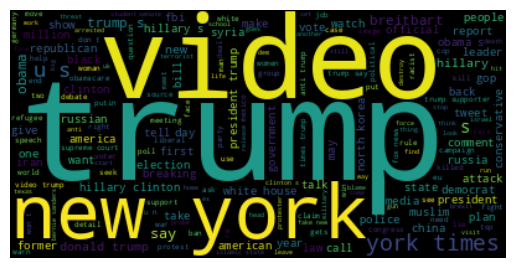

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = " ".join(i for i in df.title)

wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()



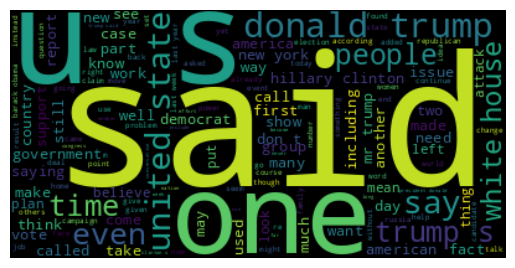

In [34]:
text = " ".join(i for i in df.text)

wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import torch
from torch.utils.data import DataLoader, TensorDataset
from torch import nn
from torch.functional import F
from torch import optim
import pickle


X = df[["title", "text"]]
y = df["label"].to_numpy()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=21)


vectorizer = TfidfVectorizer()


X_train_combined = X_train["title"] + " " + X_train["text"]
X_test_combined = X_test["title"] + " " + X_test["text"]

X_train_tfidf = vectorizer.fit_transform(X_train_combined)
X_test_tfidf = vectorizer.transform(X_test_combined)

with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X_train_tensor = torch.from_numpy(X_train_tfidf.toarray()).float().to(device)
X_test_tensor = torch.from_numpy(X_test_tfidf.toarray()).float().to(device)
y_train_tensor = torch.from_numpy(y_train).long().to(device)
y_test_tensor = torch.from_numpy(y_test).long().to(device)


batch_size = 32

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [36]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F


input_size = X_train_tensor.shape[1]  
hidden_size = 8  


class ClassifierNN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(ClassifierNN, self).__init__()
        self.n1 = nn.Linear(input_size, hidden_size)
        self.n2 = nn.Linear(hidden_size, hidden_size)
        self.n3 = nn.Linear(hidden_size, 1)

    def forward(self, x):
        x = F.relu(self.n1(x))
        x = F.relu(self.n2(x))
        x = self.n3(x)
        return x

model = ClassifierNN(input_size, hidden_size).to(device)


criterion = nn.BCEWithLogitsLoss()  
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 5 

for epoch in range(num_epochs):
    
    model.train()
    train_loss = 0
    correct = 0
    total = 0

    for data, labels in train_loader:
        data, labels = data.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, labels.float().unsqueeze(1)) 
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        predicted = torch.round(torch.sigmoid(outputs))  
        total += labels.size(0)
        correct += (predicted == labels.unsqueeze(1)).sum().item()

    train_loss /= len(train_loader)
    train_accuracy = 100 * correct / total

    
    model.eval()
    test_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for data, labels in test_loader:
            data, labels = data.to(device), labels.to(device)
            outputs = model(data)
            predicted = torch.round(torch.sigmoid(outputs))
            total += labels.size(0)
            correct += (predicted == labels.unsqueeze(1)).sum().item()

    test_accuracy = 100 * correct / total
    test_loss /= len(test_loader)

    print(f"Epoch {epoch+1}, Train Accuracy: {train_accuracy:.2f}%, Train Loss: {train_loss:.4f} | Test Accuracy: {test_accuracy:.2f}%, Test Loss: {test_loss: .4f}")


Epoch 1, Train Accuracy: 85.79%, Train Loss: 0.3704 | Test Accuracy: 95.26%, Test Loss:  0.0000
Epoch 2, Train Accuracy: 98.12%, Train Loss: 0.0675 | Test Accuracy: 96.39%, Test Loss:  0.0000
Epoch 3, Train Accuracy: 99.71%, Train Loss: 0.0171 | Test Accuracy: 96.51%, Test Loss:  0.0000
Epoch 4, Train Accuracy: 99.97%, Train Loss: 0.0049 | Test Accuracy: 96.65%, Test Loss:  0.0000
Epoch 5, Train Accuracy: 99.99%, Train Loss: 0.0019 | Test Accuracy: 96.59%, Test Loss:  0.0000


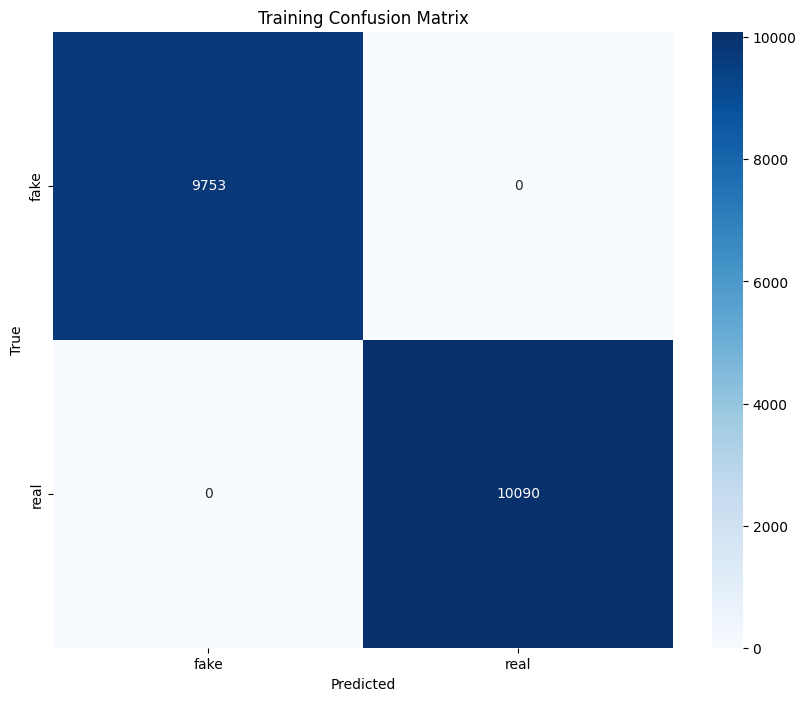

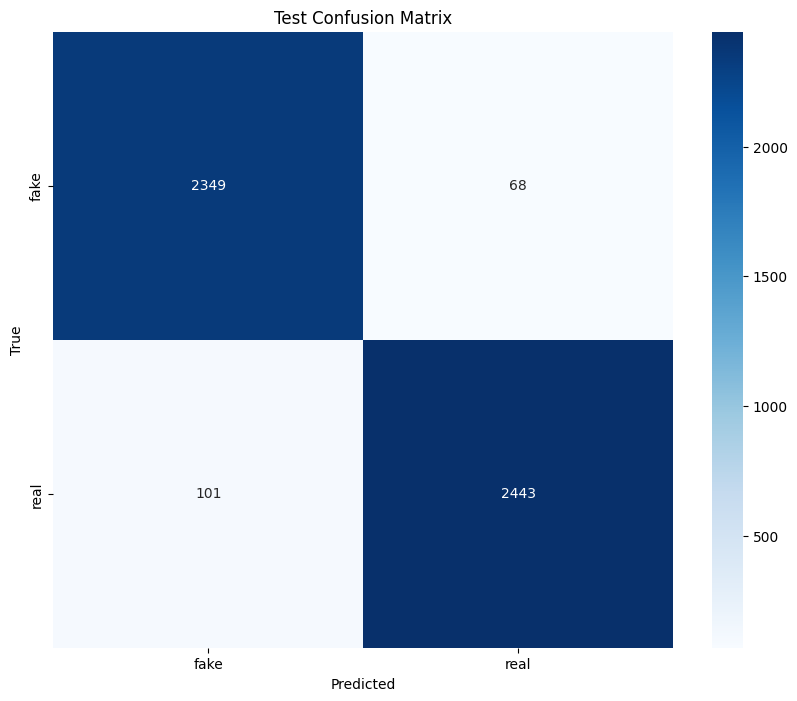

Train Precision: 1.0000, Train Recall: 1.0000, Train F1 Score: 1.0000
Test Precision: 0.9729, Test Recall: 0.9603, Test F1 Score: 0.9666


In [37]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

class_names = ["fake", "real"]

def plot_confusion_matrix(cm, class_names, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

model.eval()
all_train_labels = []
all_train_predictions = []
with torch.no_grad():
    for data, labels in train_loader:
        data, labels = data.to(device), labels.to(device)
        outputs = model(data)
        predicted = torch.round(torch.sigmoid(outputs))
        all_train_labels.extend(labels.cpu().numpy())
        all_train_predictions.extend(predicted.cpu().numpy())

cm_train = confusion_matrix(all_train_labels, all_train_predictions)
plot_confusion_matrix(cm_train, class_names, "Training Confusion Matrix")
train_precision = precision_score(all_train_labels, all_train_predictions)
train_recall = recall_score(all_train_labels, all_train_predictions)
train_f1 = f1_score(all_train_labels, all_train_predictions)

all_test_labels = []
all_test_predictions = []
with torch.no_grad():
    for data, labels in test_loader:
        data, labels = data.to(device), labels.to(device)
        outputs = model(data)
        predicted = torch.round(torch.sigmoid(outputs))
        all_test_labels.extend(labels.cpu().numpy())
        all_test_predictions.extend(predicted.cpu().numpy())

cm_test = confusion_matrix(all_test_labels, all_test_predictions)
plot_confusion_matrix(cm_test, class_names, "Test Confusion Matrix")
test_precision = precision_score(all_test_labels, all_test_predictions)
test_recall = recall_score(all_test_labels, all_test_predictions)
test_f1 = f1_score(all_test_labels, all_test_predictions)


print(f"Train Precision: {train_precision:.4f}, Train Recall: {train_recall:.4f}, Train F1 Score: {train_f1:.4f}")
print(f"Test Precision: {test_precision:.4f}, Test Recall: {test_recall:.4f}, Test F1 Score: {test_f1:.4f}")



In [38]:
torch.save(model.state_dict(), 'model_weights.pth')